In [ ]:
# Install required libraries
!pip install diffusers transformers accelerate bitsandbytes safetensors peft datasets -q
!pip install git+https://github.com/huggingface/diffusers.git -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml

In [ ]:
# Login to Hugging Face
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Mount Google Drive (optional, for saving model checkpoints)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Set paths
import os
dataset_path = "/content/drive/MyDrive/data/datasets/beachybeach"
image_dir = os.path.join(dataset_path, "images")
caption_dir = os.path.join(dataset_path, "captions")
instance_prompt = "a photo of sksbbb beachybeach"  # use a rare token/class like 'sks'
output_dir = "/content/drive/MyDrive/data/datasets/beachybeach-lora-model/"

# # # Define your data paths
# # # Adjust these paths if your data is not directly under /content/gdrive/MyDrive
# IMAGE_DIR = "/content/gdrive/MyDrive/data/datasets/beachybeach/images/" # Change to your actual image directory
# CAPTION_DIR = "/content/gdrive/MyDrive/data/datasets/beachybeach/captions/" # Change to your actual caption directory

In [ ]:
# Prepare dataset in Hugging Face format
from datasets import Dataset
import glob

assert(os.path.isdir(image_dir))
# print(image_dir)
image_paths = sorted(glob.glob(f"{image_dir}/*.jpeg"))

data = []

for img_path in image_paths:
    basename = os.path.basename(img_path)
    caption_path = os.path.join(caption_dir, basename.replace(".jpeg", ".txt"))
    with open(caption_path, "r") as f:
        caption = f.read().strip()
    data.append({"image": img_path, "caption": caption})

dataset = Dataset.from_list(data)

/content/drive/MyDrive/data/datasets/beachybeach/images/image_1.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_2.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_3.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_4.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_5.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_6.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_7.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_8.jpeg
/content/drive/MyDrive/data/datasets/beachybeach/images/image_9.jpeg


In [ ]:
print(dataset)

Dataset({
    features: ['image', 'caption'],
    num_rows: 9
})


In [ ]:
# Save dataset temporarily
dataset.save_to_disk("/content/drive/MyDrive/data/datasets/beachybeach_hf_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/9 [00:00<?, ? examples/s]

In [ ]:
!git clone https://github.com/huggingface/diffusers.git
%cd diffusers/examples/dreambooth

Cloning into 'diffusers'...
remote: Enumerating objects: 93786, done.
remote: Counting objects: 100% (420/420), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 93786 (delta 300), reused 129 (delta 126), pack-reused 93366 (from 4)
Receiving objects: 100% (93786/93786), 70.07 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (69071/69071), done.
/content/diffusers/examples/dreambooth


In [ ]:
instance_data_dir = "/content/drive/MyDrive/data/datasets/beachybeach/images"
output_dir = "/content/drive/MyDrive/data/datasets/beachybeach_lora_model"
instance_prompt = "a photo of sksbbx beachybeach"

In [ ]:
!accelerate launch train_dreambooth_lora.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --instance_data_dir="{instance_data_dir}" \
  --output_dir="{output_dir}" \
  --instance_prompt="{instance_prompt}" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=100 \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --checkpointing_steps=50 \
  --train_text_encoder \
  --seed=42

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-06-06 14:39:31.798235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749220771.827453    9844 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749220771.836153    9844 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
tokenizer_config.json: 100% 806/806 [00:00<00:00, 5.84

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:325: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that CompVis/stable-diffusion-v1-4 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'CompVis/stable-diffusion-v1-4 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:30

  0%|          | 0/50 [00:00<?, ?it/s]

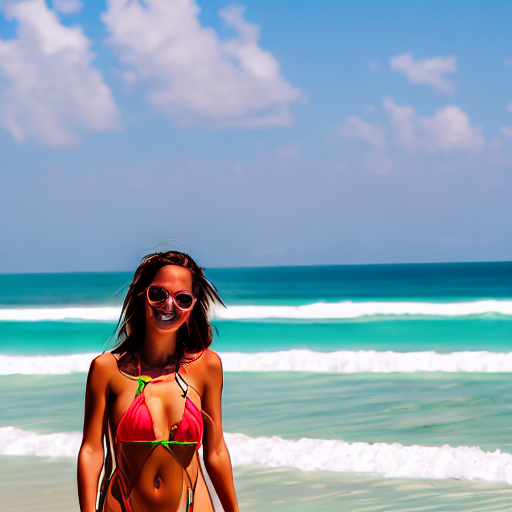

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display
from PIL import Image

# Load base model
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16,
    revision="fp16"
).to("cuda")

# Load trained LoRA weights
pipe.load_lora_weights("/content/drive/MyDrive/data/datasets/beachybeach_lora_model")

# Generate image with prompt
prompt = "sksbbx beachybeach in a beach"
image = pipe(prompt).images[0]

# Display the image in notebook
display(image)


In [ ]:
import numpy as np

# Create output directory
output_dir = "/content/drive/MyDrive/data/datasets/lora_model_beachybeach/"
os.makedirs(output_dir, exist_ok=True)


prompts = ["a photo sksbbx beachybeach in a beach in red bikini facing forward and close up and standing with not wearing sunglasses",
          "a photo sksbbx beachybeach in a beach in green bikini facing forward and little bit down sitting with not wearing sunglasses",
          "a photo sksbbx beachybeach in a beach in blue bikini looking slightly up and standing with not wearing sunglasses",
          "a photo sksbbx beachybeach in a beach in yellow bikini looking slightly up and left and sitting with not wearing sunglasses",
          "a photo sksbbx beachybeach in a beach in red bikini facing forward and standing with not wearing sunglasses",
          "a photo sksbbx beachybeach in a beach in green bikini facing forward and sitting with not wearing sunglasses",
          "a photo sksbbx beachybeach in a beach in blue bikini looking slightly down and standing with not wearing sunglasses",
          "a photo sksbbx beachybeach in a beach in green bikini looking slightly down and standing with not wearing sunglasses",
           "a photo sksbbx beachybeach in a beach in red bikini looking slightly down and standing with not wearing sunglasses",
           "a photo sksbbx beachybeach in a beach in yellow bikini looking slightly down and standing with not wearing sunglasses",
]

for i in range(len(prompts)):
    generator = torch.manual_seed(np.random.randint(0, 30000))
    image = pipe(prompts[i], generator=generator).images[0]

    # Save image
    image_path = os.path.join(output_dir, f"beachybeach_{20 + i}.png")
    image.save(image_path)

    print(f"Saved: {image_path}")




  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_20.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_21.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_22.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_23.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_24.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_25.png


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_26.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_27.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_28.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/data/datasets/lora_model_beachybeach/beachybeach_29.png


In [ ]:
import numpy as np
print(np.random.randint(0, 30000))

12999
